# CIV1498 - Introduction to Data Science
## Project 2 - Toronto Bike Share - Modeling Part

## Setup Notebook

In [1]:
# Import 3rd party libraries
import os
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np

# Configure Notebook
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_context("notebook")
import warnings
warnings.filterwarnings('ignore')

# 1. Weather Data

In [2]:
# Set weather data path
path_weather = os.path.join(os.path.abspath(os.getcwd()), 'data', 'weather')

# Get weather file names
weather_filenames = [filename for filename in os.listdir(path_weather) if 'climate' in filename]

# Print file names
print(weather_filenames[0:5])

['en_climate_hourly_ON_6158359_11-2021_P1H.csv', 'en_climate_hourly_ON_6158359_03-2021_P1H.csv', 'en_climate_hourly_ON_6158359_04-2021_P1H.csv', 'en_climate_hourly_ON_6158359_04-2017_P1H.csv', 'en_climate_hourly_ON_6158359_03-2017_P1H.csv']


# 2. Bike Share Trip Data

In [3]:
# Set bikeshare data path
path_ridership = os.path.join(os.path.abspath(os.getcwd()), 'data', 'ridership')

# Create a list of file names for bike share trips data
trips_filenames = [filename for filename in os.listdir(os.path.join(path_ridership, 'release')) if 'bike_share' in filename]

# Create a dictionary where key:value pairs correspond to the file name and DataFrame respectively
trips_data = {filename: pd.read_csv(os.path.join(path_ridership, 'release', filename)) for filename in trips_filenames}  

# Now lets print out the column names for the first month of each year
print('2017\n{}\n'.format(trips_data['bike_share_2017-1.csv'].columns.tolist()))
print('2018\n{}\n'.format(trips_data['bike_share_2018-1.csv'].columns.tolist()))
print('2019\n{}\n'.format(trips_data['bike_share_2019-1.csv'].columns.tolist()))
print('2020\n{}\n'.format(trips_data['bike_share_2020-1.csv'].columns.tolist()))
print('2021\n{}\n'.format(trips_data['bike_share_2021-1.csv'].columns.tolist()))

2017
['trip_id', 'trip_start_time', 'trip_stop_time', 'trip_duration_seconds', 'from_station_id', 'from_station_name', 'to_station_id', 'to_station_name', 'user_type']

2018
['trip_id', 'trip_duration_seconds', 'from_station_id', 'trip_start_time', 'from_station_name', 'trip_stop_time', 'to_station_id', 'to_station_name', 'user_type']

2019
['Trip Id', 'Subscription Id', 'Trip  Duration', 'Start Station Id', 'Start Time', 'Start Station Name', 'End Station Id', 'End Time', 'End Station Name', 'Bike Id', 'User Type']

2020
['Trip Id', 'Subscription Id', 'Trip  Duration', 'Start Station Id', 'Start Time', 'Start Station Name', 'End Station Id', 'End Time', 'End Station Name', 'Bike Id', 'User Type']

2021
['Trip Id', 'Trip  Duration', 'Start Station Id', 'Start Time', 'Start Station Name', 'End Station Id', 'End Time', 'End Station Name', 'Bike Id', 'User Type']



# 3. Station Data

In [4]:
# Set stations data path
path_ridership = os.path.join(os.path.abspath(os.getcwd()), 'data', 'stations')

# Import stations
stations = pd.read_csv(os.path.join(path_ridership, 'bikeshare_stations.csv'))

# View DataFrame
stations.head()

,station_id,name,lat,lon
0,7000,Fort York Blvd / Capreol Ct,43.639832,-79.395954
1,7001,Wellesley Station Green P,43.664964,-79.383550
2,7002,St. George St / Bloor St W,43.667333,-79.399429
3,7003,Madison Ave / Bloor St W,43.667158,-79.402761
4,7004,University Ave / Elm St,43.656518,-79.389099


# 4. Data Cleaning - Weather Data

In [5]:
# Prepare weather data
# Create a dictionary where key:value pairs correspond to the file name and DataFrame respectively
weather_data = {filename: pd.read_csv(os.path.join(path_weather, filename)) for filename in weather_filenames}

# Now lets print out the column names for the first month of each year
print('2017\n{}\n'.format(weather_data['en_climate_hourly_ON_6158359_01-2017_P1H.csv'].columns.tolist()))
print('2018\n{}\n'.format(weather_data['en_climate_hourly_ON_6158359_01-2018_P1H.csv'].columns.tolist()))
print('2019\n{}\n'.format(weather_data['en_climate_hourly_ON_6158359_01-2019_P1H.csv'].columns.tolist()))
print('2020\n{}\n'.format(weather_data['en_climate_hourly_ON_6158359_01-2020_P1H.csv'].columns.tolist()))
print('2021\n{}\n'.format(weather_data['en_climate_hourly_ON_6158359_01-2021_P1H.csv'].columns.tolist()))

2017
['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID', 'Date/Time', 'Year', 'Month', 'Day', 'Time', 'Temp (°C)', 'Temp Flag', 'Dew Point Temp (°C)', 'Dew Point Temp Flag', 'Rel Hum (%)', 'Rel Hum Flag', 'Wind Dir (10s deg)', 'Wind Dir Flag', 'Wind Spd (km/h)', 'Wind Spd Flag', 'Visibility (km)', 'Visibility Flag', 'Stn Press (kPa)', 'Stn Press Flag', 'Hmdx', 'Hmdx Flag', 'Wind Chill', 'Wind Chill Flag', 'Weather']

2018
['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID', 'Date/Time', 'Year', 'Month', 'Day', 'Time', 'Temp (°C)', 'Temp Flag', 'Dew Point Temp (°C)', 'Dew Point Temp Flag', 'Rel Hum (%)', 'Rel Hum Flag', 'Wind Dir (10s deg)', 'Wind Dir Flag', 'Wind Spd (km/h)', 'Wind Spd Flag', 'Visibility (km)', 'Visibility Flag', 'Stn Press (kPa)', 'Stn Press Flag', 'Hmdx', 'Hmdx Flag', 'Wind Chill', 'Wind Chill Flag', 'Weather']

2019
['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID', 'Date/Time', 'Year', 'Month', 'Day', 'Time', 'Temp (°C)', 'Temp F

We can see that weather data in 2021 has some different column names. The most important one that we have to deal with is "Data/Time (LST)".

In [6]:
# Drop the columns related to precipitation and the column named "Time" or "Time (LST)"
# Rename "Date/Time (LST)" to "Date/Time"
for key in weather_data:
    if '2021' not in key:
        weather_data[key].drop(columns=['Time'], inplace=True, axis=1)
    else:
        weather_data[key].drop(columns=['Time (LST)', 'Precip. Amount (mm)', 'Precip. Amount Flag'], inplace=True, axis=1)
        weather_data[key].rename(columns = {'Date/Time (LST)': 'Date/Time'}, inplace = True)

# Check column names again
print('2017\n{}\n'.format(weather_data['en_climate_hourly_ON_6158359_01-2017_P1H.csv'].columns.tolist()))
print('2018\n{}\n'.format(weather_data['en_climate_hourly_ON_6158359_01-2018_P1H.csv'].columns.tolist()))
print('2019\n{}\n'.format(weather_data['en_climate_hourly_ON_6158359_01-2019_P1H.csv'].columns.tolist()))
print('2020\n{}\n'.format(weather_data['en_climate_hourly_ON_6158359_01-2020_P1H.csv'].columns.tolist()))
print('2021\n{}\n'.format(weather_data['en_climate_hourly_ON_6158359_01-2021_P1H.csv'].columns.tolist()))

2017
['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID', 'Date/Time', 'Year', 'Month', 'Day', 'Temp (°C)', 'Temp Flag', 'Dew Point Temp (°C)', 'Dew Point Temp Flag', 'Rel Hum (%)', 'Rel Hum Flag', 'Wind Dir (10s deg)', 'Wind Dir Flag', 'Wind Spd (km/h)', 'Wind Spd Flag', 'Visibility (km)', 'Visibility Flag', 'Stn Press (kPa)', 'Stn Press Flag', 'Hmdx', 'Hmdx Flag', 'Wind Chill', 'Wind Chill Flag', 'Weather']

2018
['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID', 'Date/Time', 'Year', 'Month', 'Day', 'Temp (°C)', 'Temp Flag', 'Dew Point Temp (°C)', 'Dew Point Temp Flag', 'Rel Hum (%)', 'Rel Hum Flag', 'Wind Dir (10s deg)', 'Wind Dir Flag', 'Wind Spd (km/h)', 'Wind Spd Flag', 'Visibility (km)', 'Visibility Flag', 'Stn Press (kPa)', 'Stn Press Flag', 'Hmdx', 'Hmdx Flag', 'Wind Chill', 'Wind Chill Flag', 'Weather']

2019
['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID', 'Date/Time', 'Year', 'Month', 'Day', 'Temp (°C)', 'Temp Flag', 'Dew Point Temp (°

In [7]:
# Create a dictionary where key:value pairs correspond to the file name and DataFrame respectively
weather_data = pd.concat(weather_data.values(), ignore_index = True)

# Set Date/Time as the index such that the index of Weather_data is composed of Timestamps
weather_data = weather_data.set_index('Date/Time')
weather_data.index = pd.DatetimeIndex(weather_data.index)

# Localize the Timestamps to Eastern Standard Time (EST)
weather_data.index = weather_data.index.tz_localize(tz = 'EST')

# View DataFrame
weather_data.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Temp (°C),Temp Flag,Dew Point Temp (°C),...,Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather,Precip. Amount (mm),Precip. Amount Flag
Date/Time,,,,,,,,,,,,,,,,,,,,,
2021-11-01 00:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2021,11,1,9.3,NaN,3.1,...,NaN,100.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-01 01:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2021,11,1,8.5,NaN,3.1,...,NaN,100.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-01 02:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2021,11,1,8.0,NaN,1.4,...,NaN,100.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-01 03:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2021,11,1,7.7,NaN,1.1,...,NaN,100.41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-01 04:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2021,11,1,7.0,NaN,0.7,...,NaN,100.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can try to visualize part of the data, using the temperature column

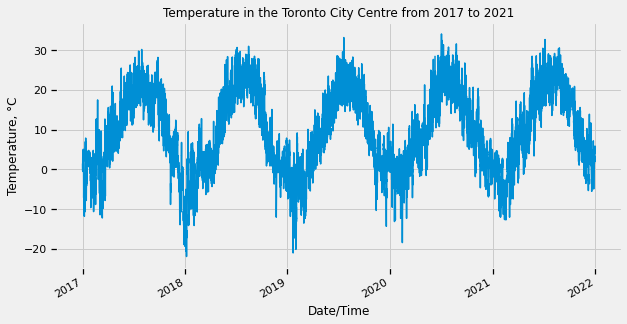

In [8]:
plt = weather_data[['Temp (°C)']].plot(figsize = (9, 5), 
                                          title = 'Temperature in the Toronto City Centre from 2017 to 2021',
                                          ylabel = 'Temperature, °C',
                                          legend = False)

Now we look into the weather data.

In [9]:
weather_data.dtypes

Longitude (x)          float64
Latitude (y)           float64
Station Name            object
Climate ID               int64
Year                     int64
Month                    int64
Day                      int64
Temp (°C)              float64
Temp Flag               object
Dew Point Temp (°C)    float64
Dew Point Temp Flag     object
Rel Hum (%)            float64
Rel Hum Flag            object
Wind Dir (10s deg)     float64
Wind Dir Flag           object
Wind Spd (km/h)        float64
Wind Spd Flag           object
Visibility (km)        float64
Visibility Flag         object
Stn Press (kPa)        float64
Stn Press Flag          object
Hmdx                   float64
Hmdx Flag              float64
Wind Chill             float64
Wind Chill Flag        float64
Weather                 object
Precip. Amount (mm)    float64
Precip. Amount Flag    float64
dtype: object

In [10]:
weather_data_missing = weather_data.isnull().sum(axis = 0).to_frame(name = 'count')
weather_data_missing

,count
Longitude (x),0
Latitude (y),0
Station Name,0
Climate ID,0
Year,0
Month,0
Day,0
Temp (°C),149
Temp Flag,43723
Dew Point Temp (°C),224


In [11]:
weather_data['Weather'].unique().tolist()

[nan,
 'Rain',
 'Fog',
 'Moderate Rain',
 'Rain,Fog',
 'Snow',
 'Haze',
 'Thunderstorms',
 'Thunderstorms,Rain',
 'Thunderstorms,Rain,Fog',
 'Moderate Rain,Fog',
 'Rain,Snow',
 'Freezing Rain,Snow',
 'Moderate Snow',
 'Heavy Rain,Fog',
 'Thunderstorms,Moderate Rain',
 'Thunderstorms,Fog',
 'Thunderstorms,Heavy Rain,Fog',
 'Freezing Rain,Fog',
 'Freezing Rain',
 'Thunderstorms,Moderate Rain,Fog',
 'Thunderstorms,Heavy Rain',
 'Snow,Blowing Snow',
 'Heavy Snow',
 'Haze,Blowing Snow']

We can see that only non-normal/clear weather events are listed. So, when weather_data['Weather'] == NaN, the conditions are clear. Therefore, we would never want to remove rows where weather_data['Weather'] == NaN.

Before finishing cleaning weather data, we would drop some columns that will not assist with our project. Then, we will leave weather_data and address the missingness on a case-by-case basis depending on which columns we're analyzing.

In [12]:
weather_data.drop(columns = ['Temp Flag',
                             'Dew Point Temp (°C)',
                             'Dew Point Temp Flag',
                             'Rel Hum Flag',
                             'Wind Dir (10s deg)',
                             'Wind Dir Flag',
                             'Wind Spd Flag',
                             'Visibility Flag',
                             'Stn Press Flag',
                             'Hmdx',
                             'Hmdx Flag',
                             'Wind Chill',
                             'Wind Chill Flag'], inplace = True, axis = 1)
weather_data.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Temp (°C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather,Precip. Amount (mm),Precip. Amount Flag
Date/Time,,,,,,,,,,,,,,,
2021-11-01 00:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2021,11,1,9.3,65.0,30.0,16.1,100.10,NaN,NaN,NaN
2021-11-01 01:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2021,11,1,8.5,69.0,24.0,16.1,100.21,NaN,NaN,NaN
2021-11-01 02:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2021,11,1,8.0,63.0,28.0,16.1,100.29,NaN,NaN,NaN
2021-11-01 03:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2021,11,1,7.7,63.0,24.0,16.1,100.41,NaN,NaN,NaN
2021-11-01 04:00:00-05:00,-79.4,43.63,TORONTO CITY CENTRE,6158359,2021,11,1,7.0,64.0,21.0,16.1,100.50,NaN,NaN,NaN


# 5. Data Cleaning - Trip Data

In [13]:
# now, we visualize some trips data
trips_data['bike_share_2017-1.csv'].head()
#trips_data['bike_share_2020-10.csv'].head()
#trips_data['bike_share_2021-9.csv'].head()

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_id,from_station_name,to_station_id,to_station_name,user_type
0,712441,2017-01-01 05:03 (UTC),2017-01-01 05:08 (UTC),274,7006.0,Bay St / College St (East Side),7021.0,Bay St / Albert St,Member
1,712442,2017-01-01 05:03 (UTC),2017-01-01 05:12 (UTC),538,7046.0,Niagara St / Richmond St W,7147.0,King St W / Fraser Ave,Member
2,712443,2017-01-01 05:05 (UTC),2017-01-01 05:22 (UTC),992,7048.0,Front St / Yonge St (Hockey Hall of Fame),7089.0,Church St / Wood St,Member
3,712444,2017-01-01 05:09 (UTC),2017-01-01 05:26 (UTC),1005,7177.0,East Liberty St / Pirandello St,7202.0,Queen St W / York St (City Hall),Member
4,712445,2017-01-01 05:14 (UTC),2017-01-01 05:25 (UTC),645,7203.0,Bathurst St / Queens Quay W,7010.0,King St W / Spadina Ave,Member


In [14]:
# check the data types
for key in trips_data:
    print(key, 'has the following data types:\n', trips_data[key].dtypes)

bike_share_2019-1.csv has the following data types:
 Trip Id                 int64
Subscription Id         int64
Trip  Duration          int64
Start Station Id        int64
Start Time             object
Start Station Name     object
End Station Id        float64
End Time               object
End Station Name       object
Bike Id                 int64
User Type              object
dtype: object
bike_share_2020-5.csv has the following data types:
 Trip Id                 int64
Subscription Id         int64
Trip  Duration          int64
Start Station Id        int64
Start Time             object
Start Station Name     object
End Station Id        float64
End Time               object
End Station Name       object
Bike Id                 int64
User Type              object
dtype: object
bike_share_2020-4.csv has the following data types:
 Trip Id                 int64
Subscription Id         int64
Trip  Duration          int64
Start Station Id        int64
Start Time             object
Sta

There are a lot of inconsistency in data types across all files.

In [15]:
# check for missing values
for key in trips_data:
    print(key, 'has the following missing values:\n', trips_data[key].isnull().sum())

bike_share_2019-1.csv has the following missing values:
 Trip Id               0
Subscription Id       0
Trip  Duration        0
Start Station Id      0
Start Time            0
Start Station Name    0
End Station Id        0
End Time              0
End Station Name      0
Bike Id               0
User Type             0
dtype: int64
bike_share_2020-5.csv has the following missing values:
 Trip Id                 0
Subscription Id         0
Trip  Duration          0
Start Station Id        0
Start Time              0
Start Station Name      0
End Station Id        164
End Time                0
End Station Name      164
Bike Id                 0
User Type               0
dtype: int64
bike_share_2020-4.csv has the following missing values:
 Trip Id                0
Subscription Id        0
Trip  Duration         0
Start Station Id       0
Start Time             0
Start Station Name     0
End Station Id        44
End Time               0
End Station Name      44
Bike Id                0
Use

We can see that a lot of files contain missing values, especially in the columns representing station IDs or names.

First we are going to make the column names uniform throughout different years.

In [16]:
for key in trips_data:
    trips_data[key].rename(columns = {'trip_id':'Trip Id',
                                      'trip_duration_seconds':'Trip Duration',
                                      'Trip  Duration':'Trip Duration',
                                      'from_station_id':'Start Station Id',
                                      'trip_start_time':'Start Time',
                                      'from_station_name':'Start Station Name',
                                      'trip_stop_time':'End Time',
                                      'to_station_id':'End Station Id',
                                      'to_station_name':'End Station Name',
                                      'user_type':'User Type',
                                      'ï»¿Trip Id':'Trip Id'}, inplace = True)

trips_data['bike_share_2018-1.csv'].head()

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Time,End Station Id,End Station Name,User Type
0,2383648,393,7018,2018-01-01 05:47 (UTC),Bremner Blvd / Rees St,2018-01-01 05:54 (UTC),7176,Bathurst St / Fort York Blvd,Annual Member
1,2383649,625,7184,2018-01-01 05:52 (UTC),Ossington Ave / College St,2018-01-01 06:03 (UTC),7191,Central Tech (Harbord St),Annual Member
2,2383650,233,7235,2018-01-01 05:55 (UTC),Bay St / College St (West Side) - SMART,2018-01-01 05:59 (UTC),7021,Bay St / Albert St,Annual Member
3,2383651,1138,7202,2018-01-01 05:57 (UTC),Queen St W / York St (City Hall),2018-01-01 06:16 (UTC),7020,Phoebe St / Spadina Ave,Annual Member
4,2383652,703,7004,2018-01-01 06:00 (UTC),University Ave / Elm St,2018-01-01 06:12 (UTC),7060,Princess St / Adelaide St E,Annual Member


Next, we'll drop the "Bike Id" and "Subscription Id" columns as they will not be used in the analysis.

In [17]:
for key in trips_data:
    if 'Subscription Id' in trips_data[key].columns:
        trips_data[key].drop(columns=['Subscription Id'], inplace=True, axis=1)
    
    if 'Bike Id' in trips_data[key].columns:
        trips_data[key].drop(columns=['Bike Id'], inplace=True, axis=1)

trips_data['bike_share_2019-10.csv'].head()

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,User Type
0,6794858,692,7418,01/10/2019 00:00:00 (EST),College Park - Yonge St Entrance,7463.0,01/10/2019 00:11:00 (EST),Adelaide St W / Brant St,Annual Member
1,6794859,1899,7049,01/10/2019 00:00:00 (EST),Queen St W / Portland St,7292.0,01/10/2019 00:32:00 (EST),Granby St / Church St - SMART,Casual Member
2,6794860,509,7426,01/10/2019 00:00:00 (EST),Fleet St / Garrison Rd (Fort York),7160.0,01/10/2019 00:09:00 (EST),King St W / Tecumseth St,Casual Member
3,6794861,1219,7382,01/10/2019 00:02:00 (EST),Simcoe St / Adelaide St W,7120.0,01/10/2019 00:22:00 (EST),Gerrard St E / River St,Casual Member
4,6794862,650,7217,01/10/2019 00:02:00 (EST),Soho St / Queen St W,7509.0,01/10/2019 00:13:00 (EST),Ontario St / King St E,Annual Member


And we reorder the columns to make them consistent.

In [18]:
for key in trips_data:
    trips_data[key] = trips_data[key][['Trip Id', 
                                       'Trip Duration', 
                                       'Start Station Id', 
                                       'Start Time', 
                                       'Start Station Name', 
                                       'End Station Id', 
                                       'End Time', 
                                       'End Station Name', 
                                       'User Type']]

We want to verify the column renaming.

In [19]:
print('2017\n{}\n'.format(trips_data['bike_share_2017-1.csv'].columns.tolist()))
print('2018\n{}\n'.format(trips_data['bike_share_2018-1.csv'].columns.tolist()))
print('2019\n{}\n'.format(trips_data['bike_share_2019-1.csv'].columns.tolist()))
print('2020\n{}\n'.format(trips_data['bike_share_2020-1.csv'].columns.tolist()))
print('2021\n{}\n'.format(trips_data['bike_share_2021-1.csv'].columns.tolist()))

2017
['Trip Id', 'Trip Duration', 'Start Station Id', 'Start Time', 'Start Station Name', 'End Station Id', 'End Time', 'End Station Name', 'User Type']

2018
['Trip Id', 'Trip Duration', 'Start Station Id', 'Start Time', 'Start Station Name', 'End Station Id', 'End Time', 'End Station Name', 'User Type']

2019
['Trip Id', 'Trip Duration', 'Start Station Id', 'Start Time', 'Start Station Name', 'End Station Id', 'End Time', 'End Station Name', 'User Type']

2020
['Trip Id', 'Trip Duration', 'Start Station Id', 'Start Time', 'Start Station Name', 'End Station Id', 'End Time', 'End Station Name', 'User Type']

2021
['Trip Id', 'Trip Duration', 'Start Station Id', 'Start Time', 'Start Station Name', 'End Station Id', 'End Time', 'End Station Name', 'User Type']



Now, we are going to work on the columns related to time.

In [20]:
for key in trips_data:
    print(trips_data[key]['Start Time'][0], type(trips_data[key]['Start Time'][0]), trips_data[key]['End Time'][0], type(trips_data[key]['End Time'][0]))


01/01/2019 00:08:00 (EST) <class 'str'> 01/01/2019 00:33:00 (EST) <class 'str'>
01/05/2020 00:02:00 (EST) <class 'str'> 01/05/2020 00:05:00 (EST) <class 'str'>
01/04/2020 00:02:00 (EST) <class 'str'> 01/04/2020 00:07:00 (EST) <class 'str'>
01/12/2020 00:02:00 (EST) <class 'str'> 01/12/2020 00:07:00 (EST) <class 'str'>
01/10/2020 00:00:00 (EST) <class 'str'> 01/10/2020 00:15:00 (EST) <class 'str'>
01/02/2019 00:08:00 (EST) <class 'str'> 01/02/2019 00:19:00 (EST) <class 'str'>
01/06/2020 00:00:00 (EST) <class 'str'> 01/06/2020 00:05:00 (EST) <class 'str'>
01/07/2020 00:00:00 (EST) <class 'str'> 01/07/2020 00:26:00 (EST) <class 'str'>
01/03/2019 00:04:00 (EST) <class 'str'> 01/03/2019 00:18:00 (EST) <class 'str'>
01/11/2020 00:00:00 (EST) <class 'str'> 01/11/2020 00:15:00 (EST) <class 'str'>
2018-11-01 05:01 (UTC) <class 'str'> 2018-11-01 05:04 (UTC) <class 'str'>
2017-08-01 05:00 (UTC) <class 'str'> 2017-08-01 05:04 (UTC) <class 'str'>
01/07/2019 00:00:00 (EST) <class 'str'> 01/07/2019 0

When checking for missing value, we notice that some trips are missing the start or end time. We would remove those trips.

In [21]:
for key in trips_data:
    trips_data[key] = trips_data[key][(trips_data[key]['Start Time'].notna()) & (trips_data[key]['End Time'].notna())]
    print(key, 'has the following missing values:\n', trips_data[key].isnull().sum())

bike_share_2019-1.csv has the following missing values:
 Trip Id               0
Trip Duration         0
Start Station Id      0
Start Time            0
Start Station Name    0
End Station Id        0
End Time              0
End Station Name      0
User Type             0
dtype: int64
bike_share_2020-5.csv has the following missing values:
 Trip Id                 0
Trip Duration           0
Start Station Id        0
Start Time              0
Start Station Name      0
End Station Id        164
End Time                0
End Station Name      164
User Type               0
dtype: int64
bike_share_2020-4.csv has the following missing values:
 Trip Id                0
Trip Duration          0
Start Station Id       0
Start Time             0
Start Station Name     0
End Station Id        44
End Time               0
End Station Name      44
User Type              0
dtype: int64
bike_share_2020-12.csv has the following missing values:
 Trip Id                 0
Trip Duration           0
Start

Also, We saw that start and end times in 2017 and 2018 were recorded in UTC timezone, and we should localize it to EST. Plus, data is now of type str instead of datetime object, we should change it too.

In [22]:
import pytz
from datetime import datetime

for key in trips_data:
    trips_data[key]['Start Time'] = trips_data[key]['Start Time'].map(lambda x: x.split('(')[0])
    trips_data[key]['End Time'] = trips_data[key]['End Time'].map(lambda x: x.split('(')[0])
    
    trips_data[key]['Start Time'] = pd.to_datetime(trips_data[key]['Start Time'])
    trips_data[key]['End Time'] = pd.to_datetime(trips_data[key]['End Time'])
    
    time_zone_est = pytz.timezone('EST')
    
    if (('2017' in key) | ('2018' in key)):
        time_zone_current = pytz.timezone('UTC')
        trips_data[key]['Start Time'] = list(map(lambda t: t.tz_localize(time_zone_current).tz_convert(time_zone_est), trips_data[key]['Start Time']))
        trips_data[key]['End Time'] = list(map(lambda t: t.tz_localize(time_zone_current).tz_convert(time_zone_est), trips_data[key]['End Time']))

    if (('2019' in key) | ('2020' in key) | ('2021' in key)):
        trips_data[key]['Start Time'] = list(map(lambda t: t.tz_localize(time_zone_est), trips_data[key]['Start Time']))
        trips_data[key]['End Time'] = list(map(lambda t: t.tz_localize(time_zone_est), trips_data[key]['End Time']))
    
trips_data['bike_share_2018-10.csv'].head()

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,User Type
0,4158592,749,7061,2018-10-01 00:01:00-05:00,Dalton Rd / Bloor St W,7042,2018-10-01 00:14:00-05:00,Sherbourne St / Wellesley St E,Annual Member
1,4158593,433,7003,2018-10-01 00:06:00-05:00,Madison Ave / Bloor St W,7280,2018-10-01 00:13:00-05:00,Charles St E / Jarvis St - SMART,Annual Member
2,4158594,285,7024,2018-10-01 00:14:00-05:00,Dundonald St / Church St,7028,2018-10-01 00:19:00-05:00,Gould St / Mutual St,Annual Member
3,4158595,150,7190,2018-10-01 00:16:00-05:00,St. George St / Hoskin Ave,7161,2018-10-01 00:18:00-05:00,Beverley St / College St,Annual Member
4,4158596,744,7265,2018-10-01 00:21:00-05:00,Wallace Ave / Symington Ave - SMART,7136,2018-10-01 00:33:00-05:00,Queen St W / Close Ave,Annual Member


Now, we combine the dataframes to one master dataframe.

In [23]:
trips_data_total = pd.concat(trips_data.values(), ignore_index = True)
trips_data_total.head()

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,User Type
0,4581278,1547,7021.0,2019-01-01 00:08:00-05:00,Bay St / Albert St,7233.0,2019-01-01 00:33:00-05:00,King / Cowan Ave - SMART,Annual Member
1,4581279,1112,7160.0,2019-01-01 00:10:00-05:00,King St W / Tecumseth St,7051.0,2019-01-01 00:29:00-05:00,Wellesley St E / Yonge St (Green P),Annual Member
2,4581280,589,7055.0,2019-01-01 00:15:00-05:00,Jarvis St / Carlton St,7013.0,2019-01-01 00:25:00-05:00,Scott St / The Esplanade,Annual Member
3,4581281,259,7012.0,2019-01-01 00:16:00-05:00,Elizabeth St / Edward St (Bus Terminal),7235.0,2019-01-01 00:20:00-05:00,Bay St / College St (West Side) - SMART,Annual Member
4,4581282,281,7041.0,2019-01-01 00:19:00-05:00,Edward St / Yonge St,7257.0,2019-01-01 00:24:00-05:00,Dundas St W / St. Patrick St,Annual Member


Next, to remove any entries from trips_data_all which have the same "Trip Id":

In [24]:
trips_data_total = trips_data_total.drop_duplicates(subset=['Trip Id'], keep = 'first')

Outliers in your datasets can be both good and bad. One the one hand, they may contain important information while on the other hand, they skew your visualizations and may bias your models.

We now look at the summary statistics for trips_data.

In [25]:
trips_data_total.describe()

,Trip Id,Trip Duration,Start Station Id,End Station Id
count,1.219547e+07,1.219547e+07,1.116858e+07,1.116495e+07
mean,7.634228e+06,1.059844e+03,7.211747e+03,7.210408e+03
std,4.011646e+06,1.002381e+04,1.648741e+02,1.642017e+02
min,7.123820e+05,0.000000e+00,7.000000e+03,7.000000e+03
25%,4.155155e+06,4.450000e+02,7.062000e+03,7.062000e+03
50%,7.614266e+06,7.340000e+02,7.184000e+03,7.183000e+03
75%,1.110744e+07,1.158000e+03,7.323000e+03,7.321000e+03
max,1.463520e+07,1.240378e+07,7.684000e+03,7.684000e+03


The min and max values seem implausible. A trip cannot last 0 seconds and its unlikely that a trip lasted for 1.240378e+07 seconds. We can see that the average 'Trip Duration' is roughly 17.7 minutes.

We've been told by Bike Share Toronto that trips lasting less than 1 minute can be considered false trips. So we will remove all trips from trips_data with a duration less than 60 seconds.

In [26]:
trips_data_total = trips_data_total.drop(trips_data_total[trips_data_total['Trip Duration'] < 60].index)

Next, remove any 'Trip Duration' values less than Q1 - 1.5 * IQR and greater than Q3 + 1.5 * IQR.

In [27]:
Q1 = trips_data_total['Trip Duration'].quantile(0.25)
Q3 = trips_data_total['Trip Duration'].quantile(0.75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

trips_data_total = trips_data_total.drop(trips_data_total[(trips_data_total['Trip Duration'] < lower_limit) | (trips_data_total['Trip Duration'] > upper_limit)].index)

With this, we can plot a histogram + density plot of the 'Trip Duration'.

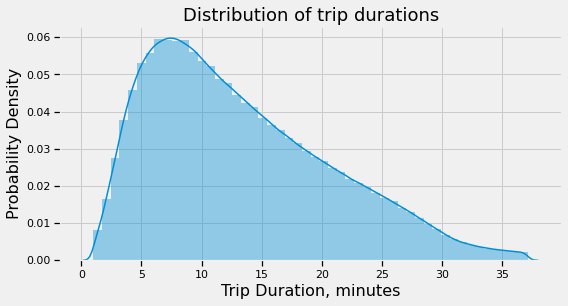

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.title('Distribution of trip durations', fontsize=18)

trips_data_total['Trip Duration'] = trips_data_total['Trip Duration'] / 60

plot_trip_duration = sns.distplot(trips_data_total['Trip Duration'], rug=False)

plt.xlabel('Trip Duration, minutes', fontsize = 16)
plt.ylabel('Probability Density', fontsize = 16)
plt.show()

The diagram makes sense, so we can move on.
To facilitate an analysis of the effect of weather on ridership, we must merge weather_data and trips_data_total.

The output of the merge would be called data_merged. We use the 'Start Time' of the rides to merge.

Because trips_data datetimes contain information down to the minute, while weather_data is reported every hour. Thus, we must merge based on a common year, month, day, hour.

In [29]:
trips_data_total['merge_time'] = trips_data_total['Start Time'].dt.floor('H')
weather_data['merge_time'] = weather_data.index

data_merged = trips_data_total.merge(right = weather_data, how = 'left', on = 'merge_time' )

# View DataFrame
data_merged.head()

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,User Type,merge_time,...,Month,Day,Temp (°C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather,Precip. Amount (mm),Precip. Amount Flag
0,4581278,25.783333,7021.0,2019-01-01 00:08:00-05:00,Bay St / Albert St,7233.0,2019-01-01 00:33:00-05:00,King / Cowan Ave - SMART,Annual Member,2019-01-01 00:00:00-05:00,...,1.0,1.0,4.3,98.0,11.0,4.8,98.49,"Rain,Fog",NaN,NaN
1,4581279,18.533333,7160.0,2019-01-01 00:10:00-05:00,King St W / Tecumseth St,7051.0,2019-01-01 00:29:00-05:00,Wellesley St E / Yonge St (Green P),Annual Member,2019-01-01 00:00:00-05:00,...,1.0,1.0,4.3,98.0,11.0,4.8,98.49,"Rain,Fog",NaN,NaN
2,4581280,9.816667,7055.0,2019-01-01 00:15:00-05:00,Jarvis St / Carlton St,7013.0,2019-01-01 00:25:00-05:00,Scott St / The Esplanade,Annual Member,2019-01-01 00:00:00-05:00,...,1.0,1.0,4.3,98.0,11.0,4.8,98.49,"Rain,Fog",NaN,NaN
3,4581281,4.316667,7012.0,2019-01-01 00:16:00-05:00,Elizabeth St / Edward St (Bus Terminal),7235.0,2019-01-01 00:20:00-05:00,Bay St / College St (West Side) - SMART,Annual Member,2019-01-01 00:00:00-05:00,...,1.0,1.0,4.3,98.0,11.0,4.8,98.49,"Rain,Fog",NaN,NaN
4,4581282,4.683333,7041.0,2019-01-01 00:19:00-05:00,Edward St / Yonge St,7257.0,2019-01-01 00:24:00-05:00,Dundas St W / St. Patrick St,Annual Member,2019-01-01 00:00:00-05:00,...,1.0,1.0,4.3,98.0,11.0,4.8,98.49,"Rain,Fog",NaN,NaN


# 6.1 Weather-related Featuring for Model

In [30]:
#check dates
data_merged['Year'].isnull().sum()

58

In [31]:
#fill missing year, month and day
data_merged['Year'] = data_merged['Start Time'].apply(lambda row: row.year)
data_merged['Month'] = data_merged['Start Time'].apply(lambda row: row.month)
data_merged['Day'] = data_merged['Start Time'].apply(lambda row: row.day)
#add a Date Column for further usage
data_merged['Date'] = data_merged['Start Time'].dt.date

In [32]:
#drop error dates: 2016 and 2021 December dates
data_merged = data_merged.drop(data_merged[data_merged.Year == 2016].index)
data_merged = data_merged.drop(data_merged[(data_merged['Month']==12)&(data_merged['Year']==2021)].index)

In [33]:
#check the dataframe dates
#data_merged.groupby(['Year','Month']).count()["Trip Id"]

In [34]:
#check the dataframe columns
data_merged.head(5)

,Trip Id,Trip Duration,Start Station Id,Start Time,Start Station Name,End Station Id,End Time,End Station Name,User Type,merge_time,...,Day,Temp (°C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather,Precip. Amount (mm),Precip. Amount Flag,Date
0,4581278,25.783333,7021.0,2019-01-01 00:08:00-05:00,Bay St / Albert St,7233.0,2019-01-01 00:33:00-05:00,King / Cowan Ave - SMART,Annual Member,2019-01-01 00:00:00-05:00,...,1,4.3,98.0,11.0,4.8,98.49,"Rain,Fog",NaN,NaN,2019-01-01
1,4581279,18.533333,7160.0,2019-01-01 00:10:00-05:00,King St W / Tecumseth St,7051.0,2019-01-01 00:29:00-05:00,Wellesley St E / Yonge St (Green P),Annual Member,2019-01-01 00:00:00-05:00,...,1,4.3,98.0,11.0,4.8,98.49,"Rain,Fog",NaN,NaN,2019-01-01
2,4581280,9.816667,7055.0,2019-01-01 00:15:00-05:00,Jarvis St / Carlton St,7013.0,2019-01-01 00:25:00-05:00,Scott St / The Esplanade,Annual Member,2019-01-01 00:00:00-05:00,...,1,4.3,98.0,11.0,4.8,98.49,"Rain,Fog",NaN,NaN,2019-01-01
3,4581281,4.316667,7012.0,2019-01-01 00:16:00-05:00,Elizabeth St / Edward St (Bus Terminal),7235.0,2019-01-01 00:20:00-05:00,Bay St / College St (West Side) - SMART,Annual Member,2019-01-01 00:00:00-05:00,...,1,4.3,98.0,11.0,4.8,98.49,"Rain,Fog",NaN,NaN,2019-01-01
4,4581282,4.683333,7041.0,2019-01-01 00:19:00-05:00,Edward St / Yonge St,7257.0,2019-01-01 00:24:00-05:00,Dundas St W / St. Patrick St,Annual Member,2019-01-01 00:00:00-05:00,...,1,4.3,98.0,11.0,4.8,98.49,"Rain,Fog",NaN,NaN,2019-01-01


In [35]:
# Deal with the weather colomn - Replace nan with 0
data_merged['Weather'] = data_merged['Weather'].fillna(0)
# Replace others with 1
data_merged['Weather'] = data_merged['Weather'].where(data_merged['Weather'] == 0, 1)
# Set Start Time colomn as index
weather_plot_data = data_merged.set_index('Start Time')


In [36]:
#Only the required colomns are remained in the dataframe
weather_plot_data = weather_plot_data[['Temp (°C)','Wind Spd (km/h)','Visibility (km)','Weather','Date']]

In [37]:
# Group the weather data by date
weather_plot_data = weather_plot_data.groupby(['Date']).agg(dict({
                                                    'Temp (°C)':'mean','Wind Spd (km/h)':'mean',
                                                    'Visibility (km)':'mean','Weather':'mean'}))

In [38]:
# Change the weather colomn to 0/1
# 0 means the weather is clear in average in that day; 1 means the weather is bad in average in that day
#weather_plot_data['Weather'][weather_plot_data['Weather']<0.5]=0
#weather_plot_data['Weather'][weather_plot_data['Weather']>=0.5]=1

# Check the weather dataframe
weather_plot_data

,Temp (°C),Wind Spd (km/h),Visibility (km),Weather
Date,,,,
2017-01-01,1.906432,19.724066,16.100000,0.000000
2017-01-02,3.708959,23.176755,15.797821,0.024213
2017-01-03,4.470264,14.672790,12.386567,0.676234
2017-01-04,-2.142796,45.756989,15.640072,0.567742
2017-01-05,-6.881157,30.936364,15.933388,0.147934
...,...,...,...,...
2021-11-26,0.008740,34.939985,16.100000,0.127458
2021-11-27,0.473495,16.278450,16.100000,0.021469
2021-11-28,-0.355926,17.337169,9.679114,0.809551


# 6.2 Nonweather-related Featuring for Model

In [39]:
#get a copy of the data_merged dataset
model_noweather = data_merged.copy()

In [40]:
#get the daily ridership
model_noweather = model_noweather[['Trip Id','Date']].groupby(['Date']).count()
model_noweather

,Trip Id
Date,
2017-01-01,482
2017-01-02,826
2017-01-03,871
2017-01-04,1395
2017-01-05,1210
...,...
2021-11-26,6865
2021-11-27,6195
2021-11-28,1738


In [41]:
#rename the column
model_noweather = model_noweather.rename(columns={"Trip Id": "Ridership"})

In [42]:
#add a temperaty column for manipulation of dates
model_noweather['Date'] = model_noweather.index

In [43]:
#add a month and a year column
model_noweather['Month'] = model_noweather['Date'].apply(lambda row: row.month)
model_noweather['Year'] = model_noweather['Date'].apply(lambda row: row.year)

In [44]:
#Create month dummy variable
month_dummy = pd.get_dummies(model_noweather['Month'], prefix='Month', drop_first=True)

In [45]:
#Create free Wednesday dummy variable
model_noweather['FreeWed'] = (((model_noweather['Month']==7)&(model_noweather['Year']==2021))|((model_noweather['Month']==9)&(model_noweather['Year']==2020))|
                 ((model_noweather['Month']==8)&(model_noweather['Year']==2019))|((model_noweather['Month']==6)&(model_noweather['Year']==2018))|
                 ((model_noweather['Month']==7)&(model_noweather['Year']==2017))).astype(int)

In [46]:
#Year Dummy
#year_dummy = pd.get_dummies(model_noweather['Year'], prefix='Year', drop_first=True)

In [47]:
#Covid Period dummy var.
model_noweather['Covid'] = (((model_noweather['Year']==2020)&(model_noweather['Month']==3))|((model_noweather['Year']==2020)&(model_noweather['Month']==4))|((model_noweather['Year']==2021)&((model_noweather['Month']>=2)|(model_noweather['Month']<=5)))).astype(int)

In [48]:
#Combine the dataframe
model_noweather = pd.concat([model_noweather,month_dummy], axis=1)

In [49]:
#check
model_noweather

,Ridership,Date,Month,Year,FreeWed,Covid,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
Date,,,,,,,,,,,,,,,,,
2017-01-01,482,2017-01-01,1,2017,0,0,0,0,0,0,0,0,0,0,0,0,0
2017-01-02,826,2017-01-02,1,2017,0,0,0,0,0,0,0,0,0,0,0,0,0
2017-01-03,871,2017-01-03,1,2017,0,0,0,0,0,0,0,0,0,0,0,0,0
2017-01-04,1395,2017-01-04,1,2017,0,0,0,0,0,0,0,0,0,0,0,0,0
2017-01-05,1210,2017-01-05,1,2017,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-26,6865,2021-11-26,11,2021,0,1,0,0,0,0,0,0,0,0,0,1,0
2021-11-27,6195,2021-11-27,11,2021,0,1,0,0,0,0,0,0,0,0,0,1,0
2021-11-28,1738,2021-11-28,11,2021,0,1,0,0,0,0,0,0,0,0,0,1,0


In [50]:
#Define if the day is a workday
import holidays
ca_holidays = list(holidays.CA(years=range(2017,2022)).keys())
model_noweather["Holiday"] = pd.to_datetime(model_noweather['Date']).dt.date.isin(ca_holidays).astype('int')
model_noweather['Workday'] = pd.Series(pd.to_datetime(model_noweather['Date']).dt.weekday<=4).astype('int') & (~model_noweather["Holiday"])

In [51]:
#drop unnecessary columns
model_noweather = model_noweather.drop(columns=['Date', 'Month','Holiday'])

In [52]:
#Have a look
model_noweather

,Ridership,Year,FreeWed,Covid,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Workday
Date,,,,,,,,,,,,,,,,
2017-01-01,482,2017,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2017-01-02,826,2017,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2017-01-03,871,2017,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2017-01-04,1395,2017,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2017-01-05,1210,2017,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-26,6865,2021,0,1,0,0,0,0,0,0,0,0,0,1,0,1
2021-11-27,6195,2021,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2021-11-28,1738,2021,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [53]:
# Merge the above dataframe with the weather data frame
model_data = pd.merge(model_noweather, weather_plot_data, left_index=True, right_index=True)
# Have a look on the combined model dataframe
model_data

,Ridership,Year,FreeWed,Covid,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Workday,Temp (°C),Wind Spd (km/h),Visibility (km),Weather
Date,,,,,,,,,,,,,,,,,,,,
2017-01-01,482,2017,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.906432,19.724066,16.100000,0.000000
2017-01-02,826,2017,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.708959,23.176755,15.797821,0.024213
2017-01-03,871,2017,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4.470264,14.672790,12.386567,0.676234
2017-01-04,1395,2017,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-2.142796,45.756989,15.640072,0.567742
2017-01-05,1210,2017,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-6.881157,30.936364,15.933388,0.147934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-26,6865,2021,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0.008740,34.939985,16.100000,0.127458
2021-11-27,6195,2021,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0.473495,16.278450,16.100000,0.021469
2021-11-28,1738,2021,0,1,0,0,0,0,0,0,0,0,0,1,0,0,-0.355926,17.337169,9.679114,0.809551


# 7. Build Model

In [54]:
import pandas as pd
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
%matplotlib inline

import itertools
import time
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.linear_model import Ridge

In [55]:
#check correlations between the variables
model_data.corr()

,Ridership,Year,FreeWed,Covid,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Workday,Temp (°C),Wind Spd (km/h),Visibility (km),Weather
Ridership,1.000000,0.424629,0.207667,0.275878,-0.200880,-0.163492,-0.116729,0.067772,0.148129,0.215625,0.251613,0.191955,0.058138,-0.079670,-0.184419,0.060304,0.577265,-0.283923,0.208898,-0.309327
Year,0.424629,1.000000,0.007292,0.707928,0.008229,0.007382,0.007156,0.007382,0.007156,0.007382,0.007382,0.007156,0.007382,0.007156,-0.088751,-0.000207,0.061620,-0.054393,0.055504,-0.046319
FreeWed,0.207667,0.007292,1.000000,-0.013276,-0.089058,-0.093805,-0.092129,-0.093805,0.125583,0.342297,0.127820,0.125583,-0.093805,-0.092129,-0.083410,-0.004086,0.323635,-0.139629,0.047488,-0.081769
Covid,0.275878,0.707928,-0.013276,1.000000,-0.015897,0.135259,0.132746,-0.015288,-0.015143,-0.015288,-0.015288,-0.015143,-0.015288,-0.015143,-0.143139,-0.001763,0.030182,-0.022687,0.067109,-0.062822
Month_2,-0.200880,0.008229,-0.089058,-0.015897,1.000000,-0.089697,-0.088094,-0.089697,-0.088094,-0.089697,-0.089697,-0.088094,-0.089697,-0.088094,-0.079757,-0.007800,-0.337029,0.137736,-0.116899,0.145375
Month_3,-0.163492,0.007382,-0.093805,0.135259,-0.089697,1.000000,-0.092790,-0.094479,-0.092790,-0.094479,-0.094479,-0.092790,-0.094479,-0.092790,-0.084009,0.015823,-0.255966,0.099532,0.014885,0.000479
Month_4,-0.116729,0.007156,-0.092129,0.132746,-0.088094,-0.092790,1.000000,-0.092790,-0.091131,-0.092790,-0.092790,-0.091131,-0.092790,-0.091131,-0.082507,-0.021328,-0.100890,0.120646,0.008440,0.014753
Month_5,0.067772,0.007382,-0.093805,-0.015288,-0.089697,-0.094479,-0.092790,1.000000,-0.092790,-0.094479,-0.094479,-0.092790,-0.094479,-0.092790,-0.084009,-0.001347,0.083609,-0.035123,0.015488,-0.024058
Month_6,0.148129,0.007156,0.125583,-0.015143,-0.088094,-0.092790,-0.091131,-0.092790,1.000000,-0.092790,-0.092790,-0.091131,-0.092790,-0.091131,-0.082507,0.022246,0.269474,-0.110371,0.066674,-0.098505
Month_7,0.215625,0.007382,0.342297,-0.015288,-0.089697,-0.094479,-0.092790,-0.094479,-0.092790,1.000000,-0.094479,-0.092790,-0.094479,-0.092790,-0.084009,-0.001347,0.402643,-0.184295,0.059707,-0.087166


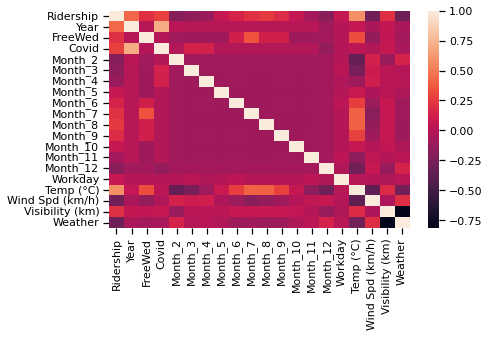

In [56]:
#Visualize the correlation
cormat = model_data.corr()
round(cormat,2)

sns.heatmap(cormat,xticklabels=cormat.columns,
        yticklabels=cormat.columns);
#We see high correlation between weather and visibility-> Drop one of them!!!

In [57]:
#rename the columns
model_data = model_data.rename(columns={"Temp (°C)": "Temp", "Wind Spd (km/h)": "Wind",'Visibility (km)':'Visibility' })

In [58]:
#split for train and test
from sklearn.model_selection import train_test_split

train, test = train_test_split(model_data, train_size=0.7, 
                               test_size=0.3, random_state=0)

print('Train:', train.shape, 'Test:', test.shape)

Train: (1248, 20) Test: (536, 20)


In [59]:
#Model test1: weather variables only
model = ols("Ridership ~ Temp +Wind +Visibility +Weather", data=train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Ridership   R-squared:                       0.382
Model:                            OLS   Adj. R-squared:                  0.380
Method:                 Least Squares   F-statistic:                     191.8
Date:                Fri, 15 Apr 2022   Prob (F-statistic):          4.35e-128
Time:                        16:47:17   Log-Likelihood:                -12027.
No. Observations:                1248   AIC:                         2.406e+04
Df Residuals:                    1243   BIC:                         2.409e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6348.1523   1663.093      3.817      0.000    3085.372    9610.932
Temp         254.9739     11.872     21.477      0.000     231.683     278.265
Wind         -46.2519     14.424     -3.207      0.001     -74.550     -17.954
Visibility   -75.8582    103.180     -0.735      0.462    -278.284     126.568
Weather    -3706.7966    917.993     -4.038      0.000   -5507.783   -1905.810
==============================================================================
Omnibus:                      261.967   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              548.574
Skew:                           1.192   Prob(JB):                    7.56e-120
Kurtosis:                       5.206   Cond. No.                         461.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
#Model test1: include all variables 
model = ols("Ridership ~ FreeWed+Covid+Month_2+Month_3+ Month_4+ Month_5+ Month_6+ Month_7+ Month_8+ Month_9+ Month_10+Month_11+Month_12+Workday+Year+Temp+Wind+Visibility+Weather", data=train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Ridership   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     80.53
Date:                Fri, 15 Apr 2022   Prob (F-statistic):          5.11e-200
Time:                        16:47:17   Log-Likelihood:                -11822.
No. Observations:                1248   AIC:                         2.368e+04
Df Residuals:                    1228   BIC:                         2.379e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.744e+06   1.89e+05    -14.489      0.000   -3.12e+06   -2.37e+06
FreeWed      317.8043    388.663      0.818      0.414    -444.714    1080.322
Covid        -25.1134    321.024     -0.078      0.938    -654.930     604.703
Month_2     -320.8073    441.514     -0.727      0.468   -1187.012     545.397
Month_3      -68.7619    444.806     -0.155      0.877    -941.425     803.902
Month_4     -570.6553    483.510     -1.180      0.238   -1519.253     377.942
Month_5     1679.9561    550.186      3.053      0.002     600.548    2759.364
Month_6     1692.6234    667.609      2.535      0.011     382.843    3002.404
Month_7     1939.2491    769.136      2.521      0.012     430.282    3448.216
Month_8     2526.7089    732.189      3.451      0.001    1090.229    3963.189
Month_9     2424.2337    672.574      3.604      0.000    1104.712    3743.755
Month_10    1529.2697    551.537      2.773      0.006     447.211    2611.329
Month_11     928.5705    467.132      1.988      0.047      12.105    1845.036
Month_12     429.2513    456.181      0.941      0.347    -465.730    1324.233
Workday      183.7484    192.856      0.953      0.341    -194.615     562.112
Year        1362.8567     93.837     14.524      0.000    1178.758    1546.956
Temp         154.2414     23.846      6.468      0.000     107.459     201.024
Wind         -27.9671     12.391     -2.257      0.024     -52.276      -3.658
Visibility  -196.6019     89.067     -2.207      0.027    -371.343     -21.861
Weather    -4585.9514    791.219     -5.796      0.000   -6138.242   -3033.661
==============================================================================
Omnibus:                      160.059   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              496.985
Skew:                           0.638   Prob(JB):                    1.21e-108
Kurtosis:                       5.816   Cond. No.                     4.26e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.26e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
#Delete Non-sig columns and high inter-correlation variables
#Final Model for train: reasonable parameter signs
model = ols("Ridership ~ Month_5+ Month_6+ Month_7+ Month_8+ Month_9+ Month_10+Month_11+Year+Temp+Wind+Weather", data=train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Ridership   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     137.6
Date:                Fri, 15 Apr 2022   Prob (F-statistic):          1.12e-205
Time:                        16:47:17   Log-Likelihood:                -11828.
No. Observations:                1248   AIC:                         2.368e+04
Df Residuals:                    1236   BIC:                         2.374e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.712e+06    1.3e+05    -20.913      0.000   -2.97e+06   -2.46e+06
Month_5     1896.5032    403.197      4.704      0.000    1105.476    2687.530
Month_6     2032.4601    502.060      4.048      0.000    1047.477    3017.443
Month_7     2378.9787    570.269      4.172      0.000    1260.176    3497.781
Month_8     2909.1054    554.951      5.242      0.000    1820.356    3997.855
Month_9     2774.3946    506.172      5.481      0.000    1781.343    3767.446
Month_10    1718.7571    407.699      4.216      0.000     918.898    2518.616
Month_11    1094.1857    351.949      3.109      0.002     403.702    1784.669
Year        1345.6032     64.228     20.950      0.000    1219.595    1471.612
Temp         145.2867     20.761      6.998      0.000     104.556     186.017
Wind         -35.6689     12.109     -2.946      0.003     -59.425     -11.913
Weather    -3056.8133    455.032     -6.718      0.000   -3949.534   -2164.093
==============================================================================
Omnibus:                      157.024   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              481.005
Skew:                           0.630   Prob(JB):                    3.56e-105
Kurtosis:                       5.768   Cond. No.                     2.91e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.91e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
#Format train and test dataset based on the final trained model
train = train[['Ridership','Month_5','Month_6','Month_7','Month_8','Month_9','Month_10','Month_11','Year','Temp','Wind','Weather']]
test = test[['Ridership','Month_5','Month_6','Month_7','Month_8','Month_9','Month_10','Month_11','Year','Temp','Wind','Weather']]

y_train=train['Ridership']
X_train=train.drop(columns='Ridership')
X_train = sm.add_constant(X_train)

y_test=test['Ridership']
X_test=test.drop(columns='Ridership')
X_test = sm.add_constant(X_test)

In [63]:
#same as final model result
olsmod = sm.OLS(y_train, X_train)
olsres = olsmod.fit()
olsres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Ridership   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     137.6
Date:                Fri, 15 Apr 2022   Prob (F-statistic):          1.12e-205
Time:                        16:47:17   Log-Likelihood:                -11828.
No. Observations:                1248   AIC:                         2.368e+04
Df Residuals:                    1236   BIC:                         2.374e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.712e+06    1.3e+05    -20.913      0.000   -2.97e+06   -2.46e+06
Month_5     1896.5032    403.197      4.704      0.000    1105.476    2687.530
Month_6     2032.4601    502.060      4.048      0.000    1047.477    3017.443
Month_7     2378.9787    570.269      4.172      0.000    1260.176    3497.781
Month_8     2909.1054    554.951      5.242      0.000    1820.356    3997.855
Month_9     2774.3946    506.172      5.481      0.000    1781.343    3767.446
Month_10    1718.7571    407.699      4.216      0.000     918.898    2518.616
Month_11    1094.1857    351.949      3.109      0.002     403.702    1784.669
Year        1345.6032     64.228     20.950      0.000    1219.595    1471.612
Temp         145.2867     20.761      6.998      0.000     104.556     186.017
Wind         -35.6689     12.109     -2.946      0.003     -59.425     -11.913
Weather    -3056.8133    455.032     -6.718      0.000   -3949.534   -2164.093
==============================================================================
Omnibus:                      157.024   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              481.005
Skew:                           0.630   Prob(JB):                    3.56e-105
Kurtosis:                       5.768   Cond. No.                     2.91e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.91e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [64]:
#predict the train set
ypred = olsres.predict(X_train)
print(ypred)

Date
2018-10-14     6441.437444
2021-11-11     8890.580867
2019-08-20    10411.671349
2018-06-12     7862.322745
2017-11-06     3524.018158
                  ...     
2019-04-16     4859.501773
2020-05-01     9049.820750
2021-07-19    11390.478275
2018-07-14     8337.711386
2018-11-16     2444.384934
Length: 1248, dtype: float64


In [65]:
#predict the test set
ypred_test = olsres.predict(X_test)
print(ypred_test)

Date
2019-10-08     8178.790858
2019-08-01    10572.196461
2020-03-29     6360.316367
2019-08-22    10381.420713
2020-11-23     6723.230059
                  ...     
2018-11-11     4342.973202
2018-07-29     8583.777300
2020-10-28     8440.374572
2021-06-17    11449.508810
2018-08-03     9353.167335
Length: 536, dtype: float64


Evaluation based on RMSE

In [66]:
#define the rmse function 
def rmse(errors):
    """Return the root mean squared error."""
    return np.sqrt(np.mean(errors ** 2))

In [67]:
#rmse for the train set prediction
rmse(ypred-y_train)

3159.7912779663043

In [68]:
#rmse for the test set prediction
rmse(ypred_test-y_test)

3569.2725056139107

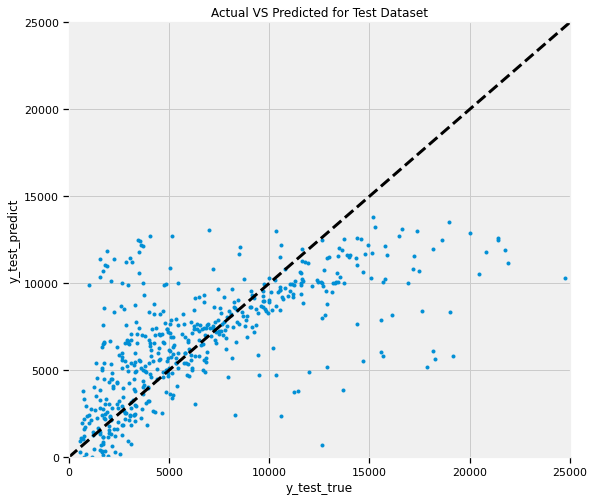

In [69]:
#plot actual vs predicted for test dataset
plt.figure(figsize=(8, 8))

plt.xlim([0, 25000])
plt.ylim([0, 25000])
plt.plot(y_test,ypred_test,'.')

xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)
plt.xlabel('y_test_true')
plt.ylabel('y_test_predict')
plt.title('Actual VS Predicted for Test Dataset')
plt.show()

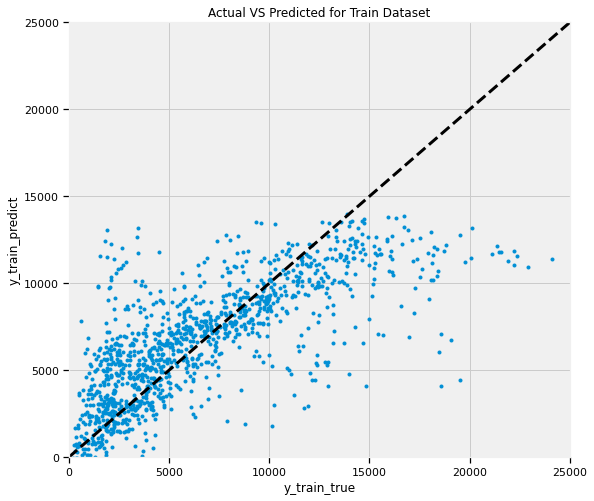

In [70]:
#plot actual vs predicted for test dataset
plt.figure(figsize=(8, 8))

plt.xlim([0, 25000])
plt.ylim([0, 25000])
plt.plot(y_train,ypred,'.')

xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)
plt.xlabel('y_train_true')
plt.ylabel('y_train_predict')
plt.title('Actual VS Predicted for Train Dataset')
plt.show()